<a href="https://colab.research.google.com/github/kanchankujur4/CNN-/blob/main/untitied20_Copy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/Demo image filters .zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sample_data')
zip_ref.close()

In [ ]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.4.1
Keras Version: 2.4.0

Python 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
Pandas 1.1.5
Scikit-Learn 0.22.2.post1
GPU is available


In [ ]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from random import randint

import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications.inception_v3 import InceptionV3

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras import Model, layers
from keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
import cv2
from IPython.display import Image

import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

print("Setup Complete!")

Setup Complete!


In [ ]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0

    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3

        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)

    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}

    return labels[class_code]

print("Setup Complete!")

Setup Complete!


In [ ]:


Images, Labels = get_images(r'/content/sample_data/Demo image/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

print("Setup Complete!")



Setup Complete!


In [ ]:


print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)



Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


plot Complete!


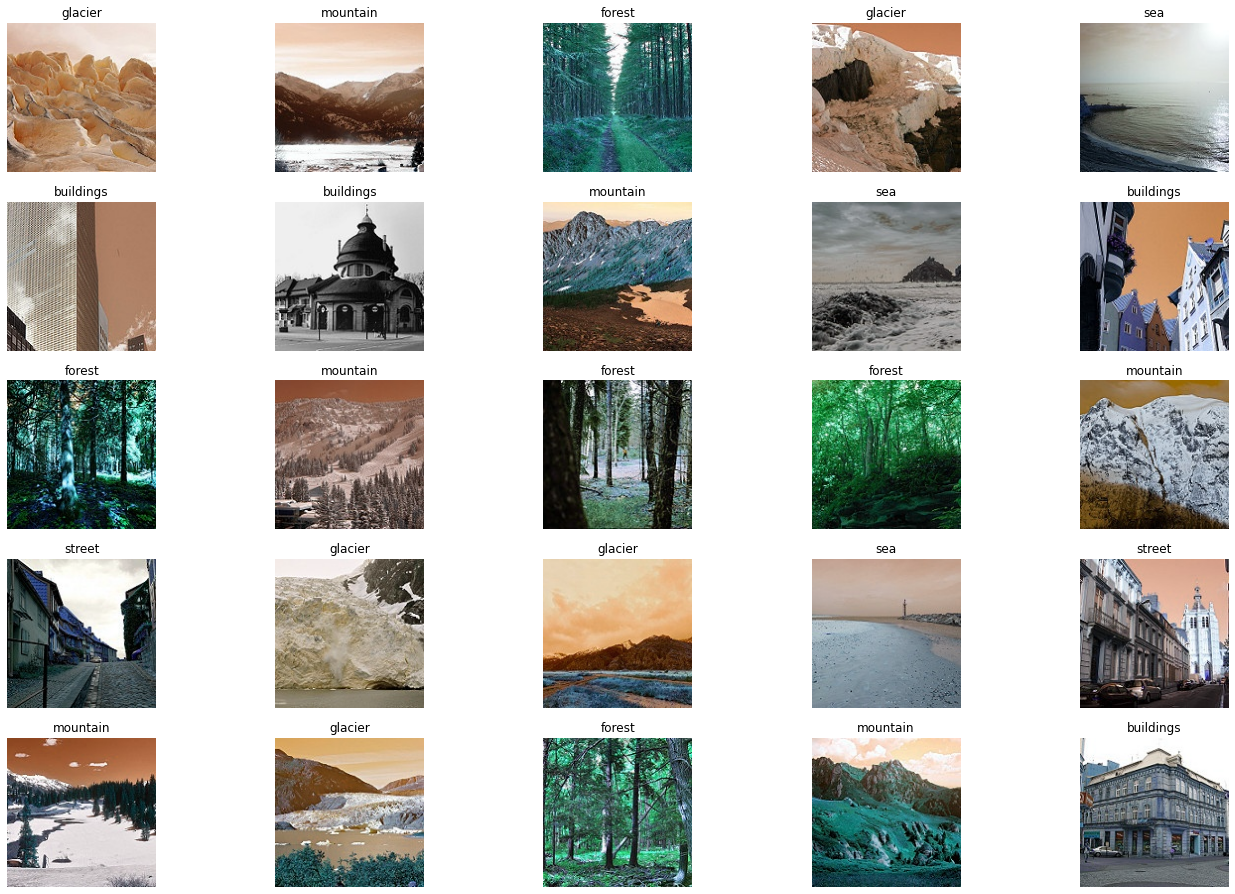

In [ ]:
#plot the train image
f,ax = plt.subplots(5,5)
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

print("plot Complete!")


In [ ]:
Dir_folder='/content/sample_data/Demo image'
data_dir=os.listdir(Dir_folder)
print(data_dir)
print("working")

['seg_train', 'seg_test', 'seg_pred']
working


In [ ]:
print("train images & classes")
train_DIR = "/content/sample_data/Demo image/seg_train/seg_train"

train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          vertical_flip=True,
                                          fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(train_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))
print("test images & classes")
test_DIR = "/content/sample_data/Demo image/seg_test/seg_test"
validation_datagen = ImageDataGenerator(rescale = 1.0/255)


validation_generator = validation_datagen.flow_from_directory(test_DIR,
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))
print("working")

train images & classes
Found 14034 images belonging to 6 classes.
test images & classes
Found 3000 images belonging to 6 classes.
working


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 128)      

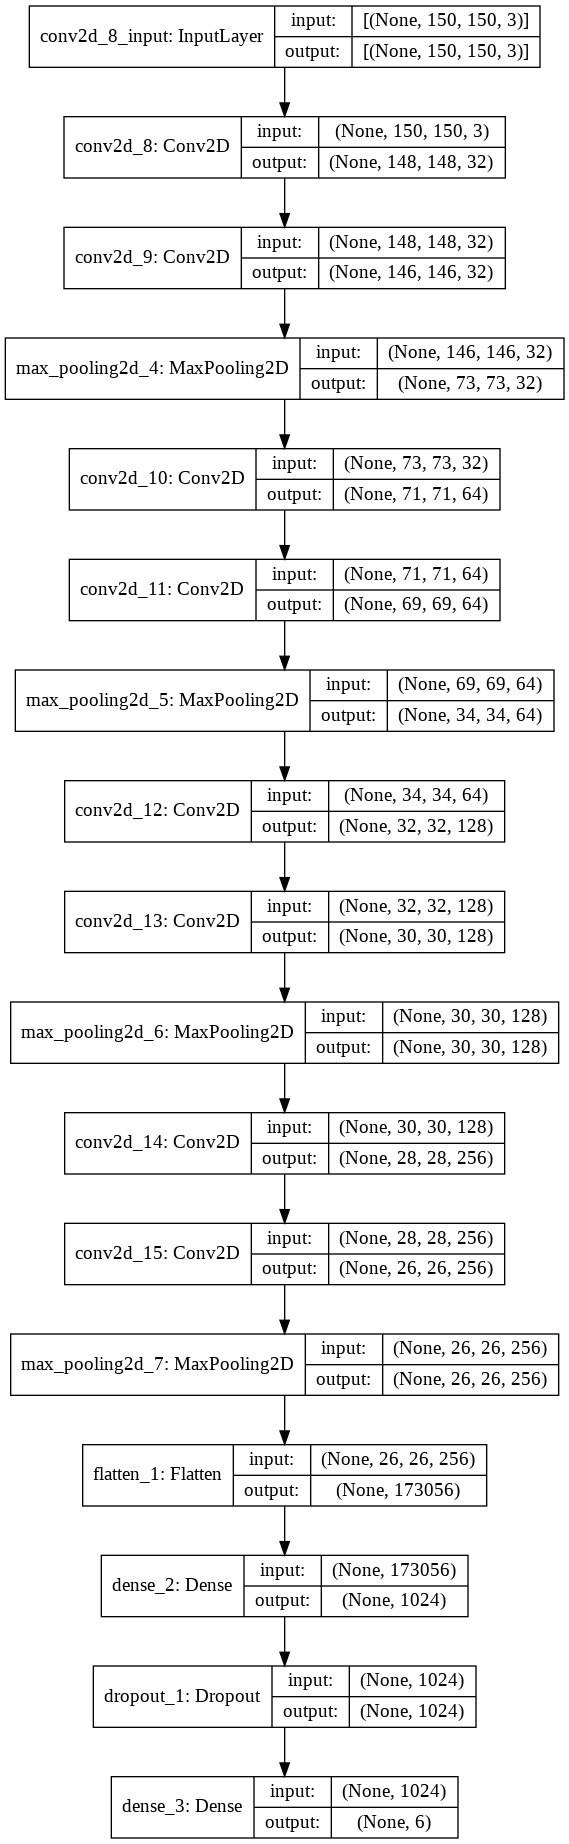

In [ ]:


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from IPython.display import Image
from keras.utils import plot_model

model = Sequential()

model.add(Conv2D(32, (3, 3),  input_shape=(150,150,3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),  activation='relu'))
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,(3, 3),  activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(256, (3, 3),  activation='relu'))
model.add(Conv2D(256, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

print("cnn model created")

print ("flow chart of the  model layers")
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)



In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

earlystop = EarlyStopping( patience=10, monitor='val_accuracy', min_delta=0,  verbose=0,
    mode='auto')


learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5,min_delta=0, mode="auto",
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.003)



callbacks = [earlystop,learning_rate_reduction,]
print("callbacks working")

callbacks working


In [ ]:
print( "train the model")
trained = model.fit(Images,Labels,epochs=25,batch_size=1,validation_split=0.30,callbacks = [callbacks])


train the model
Epoch 1/25
9823/9823 [==============================] - 417s 42ms/step - loss: 0.1306 - accuracy: 0.9747 - val_loss: 3.7506 - val_accuracy: 0.7074
Epoch 2/25
9823/9823 [==============================] - 416s 42ms/step - loss: 0.1048 - accuracy: 0.9787 - val_loss: 4.0000 - val_accuracy: 0.7670
Epoch 3/25
9823/9823 [==============================] - 417s 42ms/step - loss: 0.1170 - accuracy: 0.9780 - val_loss: 3.4946 - val_accuracy: 0.7255
Epoch 4/25
9823/9823 [==============================] - 417s 42ms/step - loss: 0.1266 - accuracy: 0.9772 - val_loss: 3.1935 - val_accuracy: 0.7369
Epoch 5/25
9823/9823 [==============================] - 417s 42ms/step - loss: 0.1269 - accuracy: 0.9765 - val_loss: 5.3997 - val_accuracy: 0.7390
Epoch 6/25
9823/9823 [==============================] - 417s 42ms/step - loss: 0.1512 - accuracy: 0.9749 - val_loss: 4.3720 - val_accuracy: 0.7552
Epoch 7/25
9823/9823 [==============================] - 417s 42ms/step - loss: 0.1115 - accuracy: 0.97

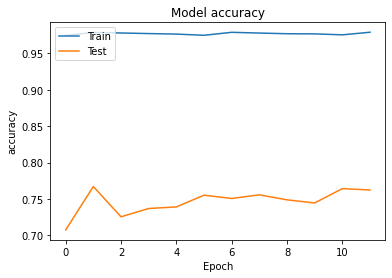

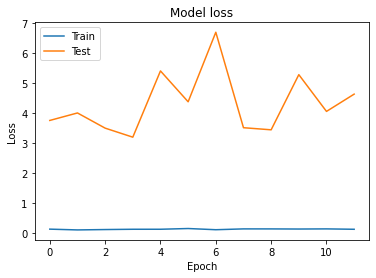

In [ ]:
#accuracy
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()
#loss
plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

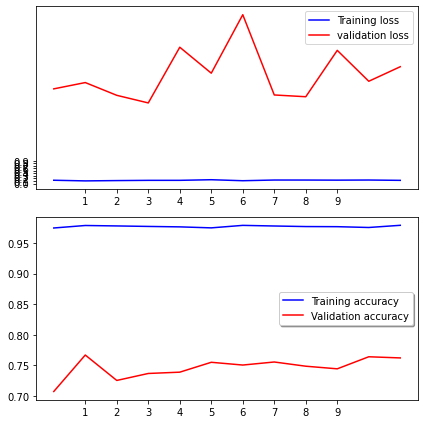

In [ ]:
##Visualize Model
epochs=10
fig, (p1, p2) = plt.subplots(2, 1, figsize=(6,6))
p1.plot(trained.history['loss'], color='b', label="Training loss")
p1.plot(trained.history['val_loss'], color='r', label="validation loss")
p1.set_xticks(np.arange(1, epochs, 1))
p1.set_yticks(np.arange(0, 1, 0.1))
p1.legend()

p2.plot(trained.history['accuracy'], color='b', label="Training accuracy")
p2.plot(trained.history['val_accuracy'], color='r',label="Validation accuracy")
p2.set_xticks(np.arange(1, epochs, 1))
p2.legend()

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
#Model Evaluation is an integral part of the model development process. It helps to find the best model that represents our data and how well the chosen model will work in the future. ... To avoid overfitting, both methods use a test set (not seen by the model) to evaluate model performance.#
#evaluate the model performance
test_loss , test_accuracy = model.evaluate(Images, Labels,verbose=1)


439/439 [==============================] - 10s 22ms/step - loss: 1.4000 - accuracy: 0.9260


In [ ]:
#evaluate
Images, Labels_recaled = (Images, Labels.astype("float32") / 255)
scores = model.evaluate(Images, Labels, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

accuracy: 92.60%
loss: 140.00%


In [ ]:
#####################################################################################################

Prediction for this image is : street


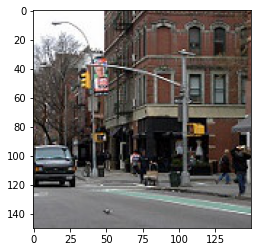

In [ ]:
import numpy as np
from keras.preprocessing import image

file_path =  '/content/sample_data/Demo image/seg_pred/seg_pred/10040.jpg'

test_image = image.load_img(file_path, target_size = (150, 150))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

classes=train_generator.class_indices

classes=['buildings','forest','glacier','mountain','sea','street']

print("Prediction for this image is :",classes[np.argmax(result)])

In [ ]:
#####################################################################################################

In [ ]:
pred_images,no_labels = get_images('/content/sample_data/Demo image/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


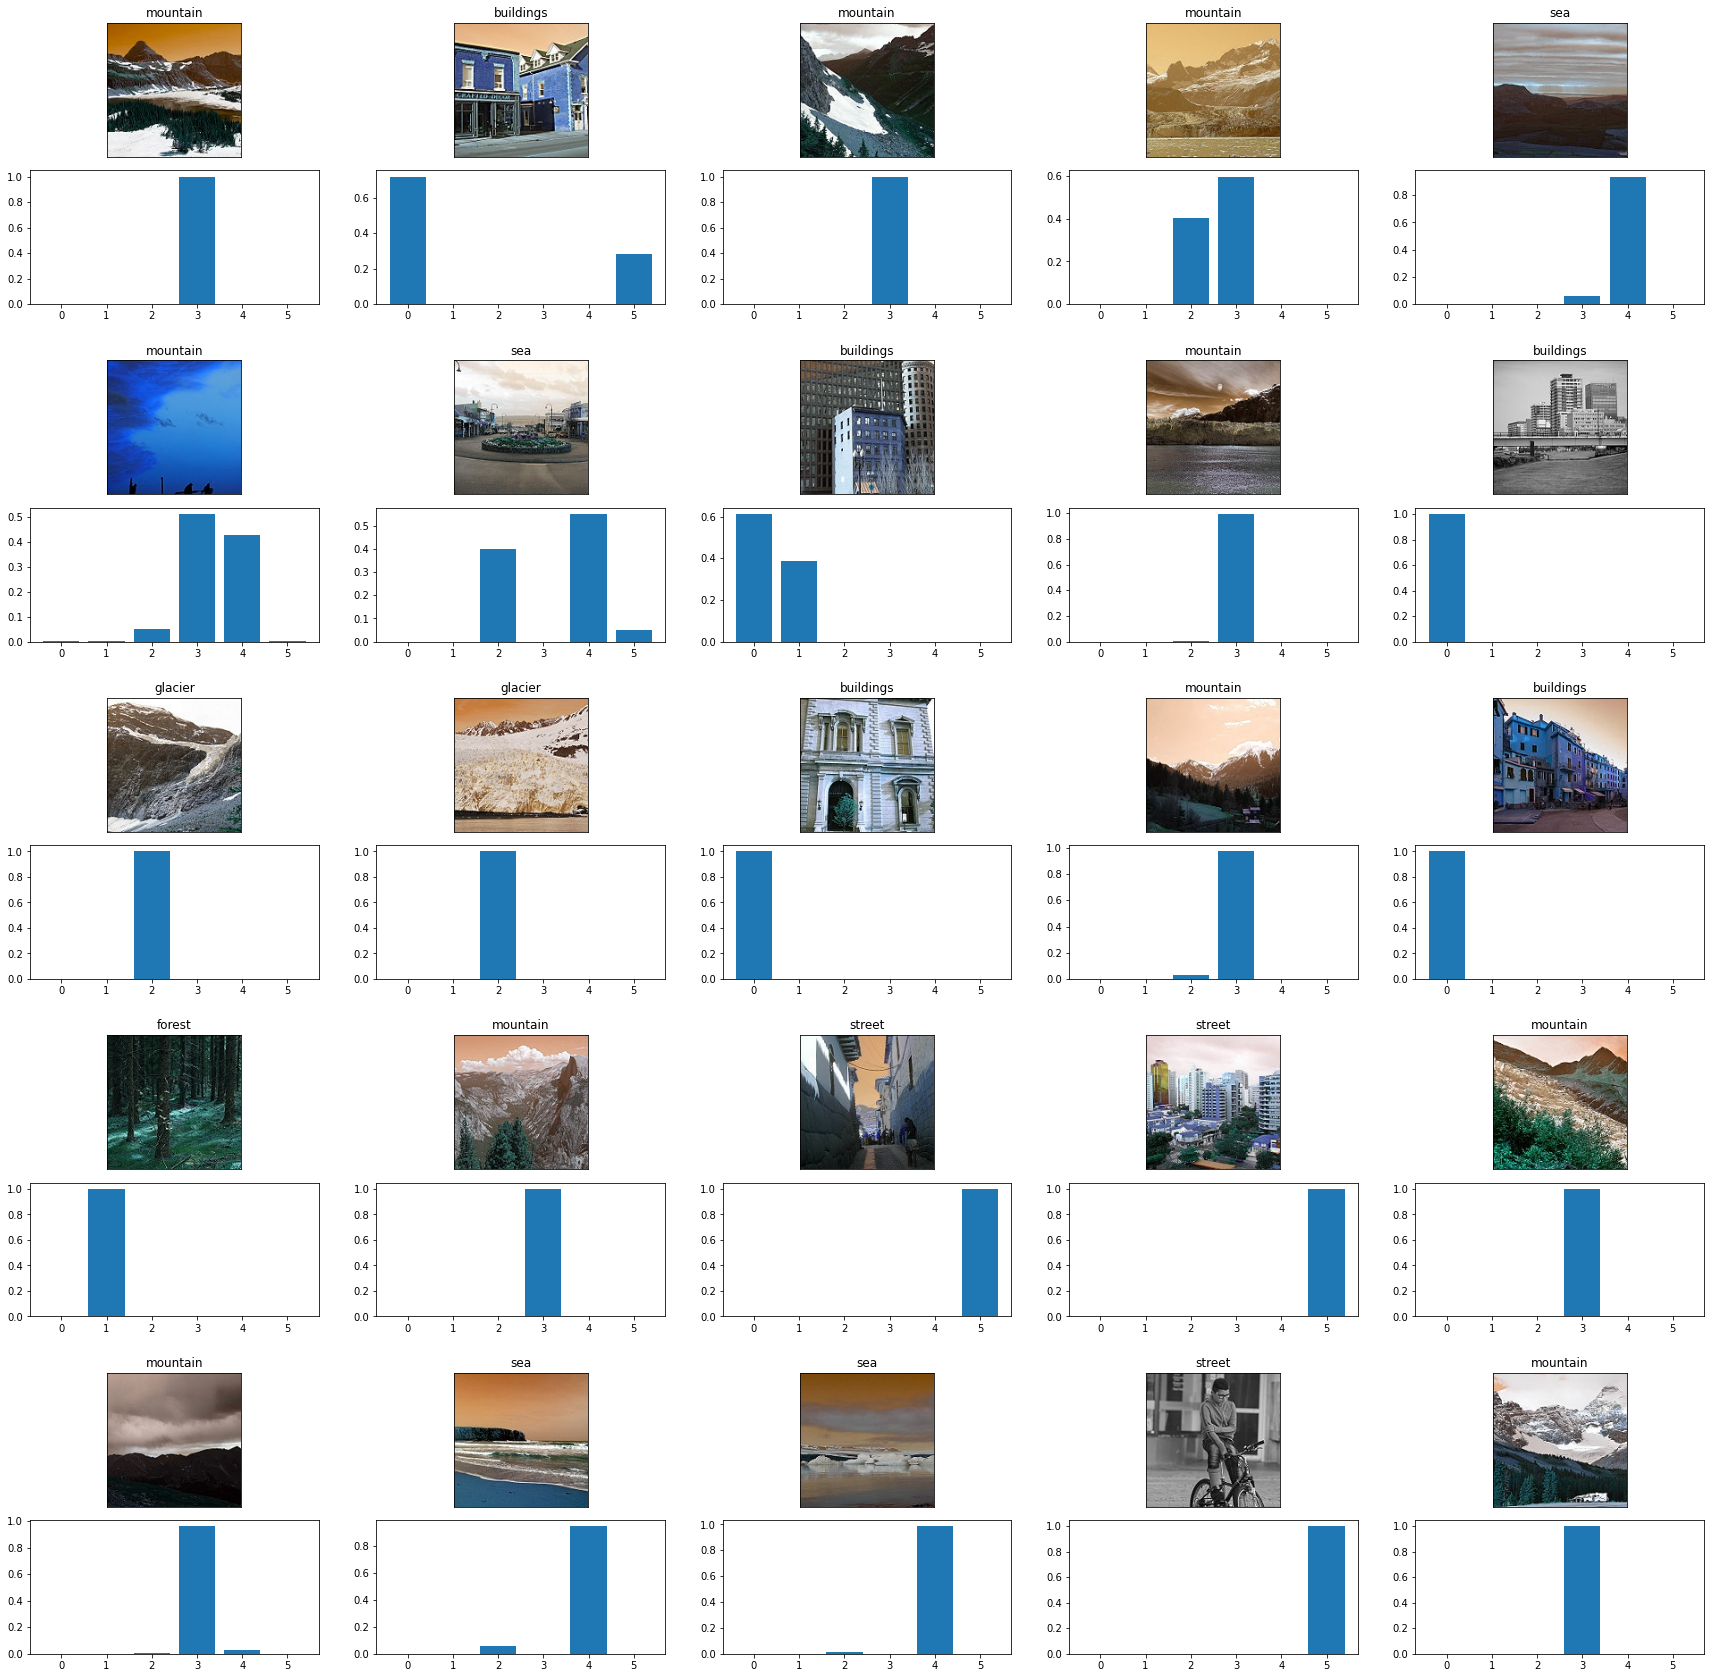

In [ ]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

In [ ]:
# Save the model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
#################################
print("model saved")

model saved


In [ ]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(model.h5)

In [ ]:
######################## end of milstone 1,2 ##########################